<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np

In [2]:
#Importation de la librairie plotly express
import plotly as pl
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
pd.set_option('display.max_columns', 50)
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
# Masque avertissement quand importation fichiers "xlsx"
warnings.filterwarnings('ignore', category = UserWarning, module = 'openpyxl')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx", engine='openpyxl')
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx", engine='openpyxl')
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx", engine='openpyxl')

In [5]:
# Afficher les premières lignes du DataFrame
df_web.head(1)

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0  11862        0             0             0             0.0          3.0   

  tax_status  tax_class  post_author           post_date       post_date_gmt  \
0        NaN        NaN          2.0 2018-02-12 13:46:23 2018-02-12 12:46:23   

   post_content product_type                         post_title post_excerpt  \
0           NaN          Vin  Gilles Robin Hermitage Rouge 2012          NaN   

  post_status comment_status ping_status  post_password  \
0     publish         closed      closed            NaN   

                     post_name       post_modified   post_modified_gmt  \
0  gilles-robin-hermitage-2012 2019-01-31 12:12:56 2019-01-31 11:12:56   

   post_content_filtered  post_parent  \
0                    NaN          0.0   

                                                guid  menu_order   post_type  \
0  https://www.bottle-neck.fr/wp-content/uploads/...         0.0  attachment   

  post_mime_type  comment_count  
0     image/jpeg            0.0

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [6]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [7]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_erp.shape[1]))

Le tableau comporte 6 colonnes


In [8]:
#La nature des données dans chacune des colonnes
types_de_donnees = df_erp.dtypes
print('La nature des données dans chacune des colonnes:',types_de_donnees)

La nature des données dans chacune des colonnes: product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object


In [9]:
#Le nombre de valeurs présentes dans chacune des colonnes
nombre_de_valeurs_par_colonne = df_erp.count()
print('Le nombre de valeurs présentes dans chacune des colonnes:',nombre_de_valeurs_par_colonne)

Le nombre de valeurs présentes dans chacune des colonnes: product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [10]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77

In [11]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
duplicates = df_erp[df_erp['product_id'].duplicated()]
duplicates

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []

In [12]:
#Afficher les valeurs distinctes de la colonne stock_status
distinct_values = df_erp['stock_status'].unique()
print(distinct_values)

['instock' 'outofstock']


In [13]:
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print (' Les valeurs de la colonne stock_status sont liées à la colonne stock_quantity')

 Les valeurs de la colonne stock_status sont liées à la colonne stock_quantity


In [14]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"

df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'instock' if x > 0 else 'outofstock')

In [15]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:

df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [16]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 825 qui correspond au nombre de lignes dans ce dataset

## Le Nombre de True
NBTrue =df_erp["stock_status"] == df_erp["stock_status_2"]
true_count = NBTrue.sum()
print('Le Nombre de True',true_count)

## le Nombre de False
NBFalse =df_erp["stock_status"] == df_erp["stock_status_2"]
false_count = len(NBFalse) - true_count
print('le Nombre de False',false_count)

Le Nombre de True 823
le Nombre de False 2


In [17]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

comparison = df_erp["stock_status"] == df_erp["stock_status_2"]
different_rows = df_erp[~comparison]
print("Lignes différentes:")
different_rows

Lignes différentes:


product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock

In [18]:
#Corriger la ou les données incohérentes
df_erp.at[4, 'stock_status'] = 'instock'
df_erp.at[398, 'stock_status'] = 'outofstock'
#Verification en utilisant le même code que plus haut pour afficher les problemes
comparison = df_erp["stock_status"] == df_erp["stock_status_2"]
different_rows = df_erp[~comparison]
print("Lignes différentes:")
different_rows

Lignes différentes:


Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [19]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
Prix_non_renseignés = df_erp.loc[df_erp['price'] <= 0]
Prix_non_renseignés

product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock

In [20]:
#Afficher le ou les prix non renseignés dans la colonne "price"

print("Nombres d'article avec un prix non renseignés:" )
Prix_non_renseignés

Nombres d'article avec un prix non renseignés:


product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock

In [21]:
#Afficher le prix minimum de la colonne "price"
prix_min = df_erp['price'].min()
print("Prix minimum de la colonne 'price': {}".format(prix_min))

#Afficher le prix maximum de la colonne "price"
prix_max = df_erp['price'].max()
print("Prix maximum de la colonne 'price': {}".format(prix_max))

Prix minimum de la colonne 'price': -20.0
Prix maximum de la colonne 'price': 225.0


In [22]:
#Suppression des lignes 151,469,739 car ils n'affectent pas le resultas, ne sont pas vendus en ligne¶
rows_to_drop = [151, 469, 739]

#Suppression des lignes et réinitialisation de l'index
df_erp = df_erp.drop(rows_to_drop).reset_index(drop=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [23]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
Quantie_non_renseignés = df_erp.loc[df_erp['stock_quantity'] < 0]
Quantie_non_renseignés

product_id  onsale_web  price  stock_quantity stock_status  \
448        4973           0   10.0             -10   outofstock   
571        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
448            4.96     outofstock  
571           22.30     outofstock

In [24]:
#Afficher la quantité minimum de la colonne "stock_quantity"
Quantite_min = df_erp['stock_quantity'].min()
print("Quantité minimum de la colonne 'stock_quantity': {}".format(Quantite_min))

#Afficher la quantité maximum de la colonne "stock_quantity"
Quantite_max = df_erp['stock_quantity'].max()
print("Quantité maximum de la colonne 'stock_quantity': {}".format(Quantite_max))

Quantité minimum de la colonne 'stock_quantity': -10
Quantité maximum de la colonne 'stock_quantity': 145


In [25]:
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
Quantite_inferieurs_a_zero = df_erp.loc[df_erp['stock_quantity'] < 0]
Quantite_inferieurs_a_zero

product_id  onsale_web  price  stock_quantity stock_status  \
448        4973           0   10.0             -10   outofstock   
571        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
448            4.96     outofstock  
571           22.30     outofstock

In [26]:
#Corriger la ou les données incohérentes
#Affecter 'o' aux valeurs négative
df_erp.at[448, 'stock_quantity'] = 0
df_erp.at[571, 'stock_quantity'] = 0
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
Quantite_inferieurs_a_zero = df_erp.loc[df_erp['stock_quantity'] < 0]
Quantite_inferieurs_a_zero

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [27]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?

print('La nature de la colonnes onsale_web:',df_erp['onsale_web'].dtypes)

La nature de la colonnes onsale_web: int64


In [28]:
#Quelles sont les colonnes à conserver selon vous?
print ('La colonne "stock_status_2" a ne pas conserver car est un doublon')

La colonne "stock_status_2" a ne pas conserver car est un doublon


In [29]:
# Afficher les valeurs distinctes de la colonne 'onsale_web'
valeurs_uniques_onsale_web = df_erp['onsale_web'].unique()
print("\nValeurs distinctes de la colonne 'onsale_web' :")
print(valeurs_uniques_onsale_web)
print('booléen')


Valeurs distinctes de la colonne 'onsale_web' :
[1 0]
booléen


In [30]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".

del df_erp['stock_status_2']
df_erp.head(3)

product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [31]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"

missing_values_price = df_erp['purchase_price'].isna().sum()

print("\nNombre de valeurs manquantes dans la colonne 'purchase_price' :")
print(missing_values_price)


Nombre de valeurs manquantes dans la colonne 'purchase_price' :
0


In [32]:
#Afficher le prix minimum de la colonne "purchase_price"
print('Le prix minimum de la colonne "purchase_price"', df_erp['purchase_price'].min(),'€') 
#Afficher le prix maximum de la colonne "purchase_price"
print('Le prix maximum de la colonne "purchase_price"', df_erp['purchase_price'].max(),'€') 

Le prix minimum de la colonne "purchase_price" 2.74 €
Le prix maximum de la colonne "purchase_price" 137.81 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [33]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractristiques

print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [34]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 29 colonne(s)


In [35]:
#La nature des données dans chacune des colonnes
donnees=df_web.dtypes
print("\nLa nature des données dans chacune des colonnes :")
donnees


La nature des données dans chacune des colonnes :


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object


In [36]:
#Le nombre de valeurs présentes dans chacune des colonnes

valeurs_presentes = df_web.count()
print("\nNombre de valeurs présentes dans chaque colonne :")
valeurs_presentes


Nombre de valeurs présentes dans chaque colonne :


sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
product_type             1429
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64

In [37]:
#Selon vous, quelles sont les colonnes à conserver ?
df_web.describe()

virtual  downloadable  rating_count  average_rating  total_sales  \
count   1513.0        1513.0        1513.0          1430.0  1430.000000   
mean       0.0           0.0           0.0             0.0     8.223077   
min        0.0           0.0           0.0             0.0   -56.000000   
25%        0.0           0.0           0.0             0.0     5.000000   
50%        0.0           0.0           0.0             0.0     8.000000   
75%        0.0           0.0           0.0             0.0    11.000000   
max        0.0           0.0           0.0             0.0   122.000000   
std        0.0           0.0           0.0             0.0     6.721899   

       tax_class  post_author                      post_date  \
count        0.0  1430.000000                           1430   
mean         NaN     1.998601  2018-08-22 03:22:17.090909184   
min          NaN     1.000000            2018-02-08 12:58:52   
25%          NaN     2.000000     2018-02-27 20:01:12.500000   
50%          NaN     2.000000            2018-04-19 14:56:05   
75%          NaN     2.000000            2019-01-31 14:35:47   
max          NaN     2.000000            2020-07-20 11:00:00   
std          NaN     0.037385                            NaN   

                       post_date_gmt  post_content  post_password  \
count                           1430           0.0            0.0   
mean   2018-08-22 01:53:30.097902080           NaN            NaN   
min              2018-02-08 11:58:52           NaN            NaN   
25%       2018-02-27 19:01:12.500000           NaN            NaN   
50%              2018-04-19 12:56:05           NaN            NaN   
75%              2019-01-31 13:35:47           NaN            NaN   
max              2020-07-20 09:00:00           NaN            NaN   
std                              NaN           NaN            NaN   

                       post_modified              post_modified_gmt  \
count                           1430                           1430   
mean   2020-06-20 13:59:29.781818112  2020-06-20 12:06:02.509090816   
min              2018-02-20 15:19:23            2018-02-20 14:19:23   
25%    2020-06-18 10:45:05.249999872  2020-06-18 08:45:05.249999872   
50%              2020-08-04 09:30:06            2020-08-04 07:30:06   
75%              2020-08-25 10:32:32            2020-08-25 08:32:32   
max              2020-08-27 18:55:03            2020-08-27 16:55:03   
std                              NaN                            NaN   

       post_content_filtered  post_parent  menu_order  comment_count  
count                    0.0       1430.0      1430.0         1430.0  
mean                     NaN          0.0         0.0            0.0  
min                      NaN          0.0         0.0            0.0  
25%                      NaN          0.0         0.0            0.0  
50%                      NaN          0.0         0.0            0.0  
75%                      NaN          0.0         0.0            0.0  
max                      NaN          0.0         0.0            0.0  
std                      NaN          0.0         0.0            0.0

In [38]:
# suppression des colonnes qui contient "NaN"
#############################################

# Afficher les colonnes où toutes les valeurs sont NaN
colonnes_nan = df_web.columns[df_web.isna().all()].tolist()
print("Colonnes où toutes les valeurs sont NaN:", colonnes_nan)

Colonnes où toutes les valeurs sont NaN: ['tax_class', 'post_content', 'post_password', 'post_content_filtered']


In [39]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération

colonnes_a_supprimer = ['tax_class', 'post_content', 'post_password', 'post_content_filtered']
df = df_web.drop(columns=colonnes_a_supprimer)

df.head(3)

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0  11862        0             0             0             0.0          3.0   
1  16057        0             0             0             0.0          5.0   
2  14692        0             0             0             0.0          5.0   

  tax_status  post_author           post_date       post_date_gmt  \
0        NaN          2.0 2018-02-12 13:46:23 2018-02-12 12:46:23   
1        NaN          2.0 2018-04-17 15:29:17 2018-04-17 13:29:17   
2    taxable          2.0 2019-03-19 10:06:47 2019-03-19 09:06:47   

  product_type                                         post_title  \
0          Vin                  Gilles Robin Hermitage Rouge 2012   
1          Vin  Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2          Vin      Château Fonréaud Bordeaux Blanc Le Cygne 2016   

                                        post_excerpt post_status  \
0                                                NaN     publish   
1                                                NaN     publish   
2  <div>Grâce à la complémentarité des 3 cépages ...     publish   

  comment_status ping_status                                    post_name  \
0         closed      closed                  gilles-robin-hermitage-2012   
1         closed      closed  pelle-sancerre-rouge-la-croix-au-garde-2017   
2         closed      closed        fonreaud-bordeaux-blanc-le-cygne-2016   

        post_modified   post_modified_gmt  post_parent  \
0 2019-01-31 12:12:56 2019-01-31 11:12:56          0.0   
1 2020-07-07 10:05:02 2020-07-07 08:05:02          0.0   
2 2020-04-25 21:40:31 2020-04-25 19:40:31          0.0   

                                                guid  menu_order   post_type  \
0  https://www.bottle-neck.fr/wp-content/uploads/...         0.0  attachment   
1  https://www.bottle-neck.fr/wp-content/uploads/...         0.0  attachment   
2  https://www.bottle-neck.fr/?post_type=product&...         0.0     product   

  post_mime_type  comment_count  
0     image/jpeg            0.0  
1     image/jpeg            0.0  
2            NaN            0.0

In [40]:
# Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

# Afficher toutes les valeurs de la colonne 'sku' sous forme de liste
values_list = df['sku'].tolist()
print("Valeurs de la colonne 'sku' (liste):")
print(values_list)

Valeurs de la colonne 'sku' (liste):
[11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572, 16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425, 16560, nan, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475, 13754, nan, 14680, 15875, 9636, 13849, 13662, 16564, nan, 13557, 15429, 14712, nan, 15032, 15481, 15448, 16580, 15441, nan, 804, 15300, 13958, 16071, 15678, 13895, 15711, nan, 12869, 12882, 16053, 13766, 16247, 12640, 15292, 15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953, 15413, 15733, 13809, nan, 14366, 15895, 15892, 16472, 15185, 16010, 15793, 15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490, 14507, 14149, nan, 16307, 13736, 14090, 16037, 15758, 14661, 12587, 15337, 15489, 15201, 16305, 16131, 13435, 15747, 15758, 12203, 14509, 14768, 16262, 14561, 16505, 15717, 13766, 16129, 13460, 15871, 15940, 11602, 13127, 13520, 15480, 13032, nan, 15436, 15269, nan, 15910, 19821, 16263, 15138, 15146, nan, 16580, 15126, 15482, 16186, 13

In [41]:
# les lignes où la colonne "sku" contient des valeurs manquantes et la colonne "total_sales" contient des valeurs non manquantes.

df[(df["sku"].isnull()) & (df['total_sales'].notnull())]
print('il y a des sku manquant, mais il y a des ventes enregistrées, cela pourrait indiquer un problème de qualité des données qui nécessite une investigation ou une correction.')

il y a des sku manquant, mais il y a des ventes enregistrées, cela pourrait indiquer un problème de qualité des données qui nécessite une investigation ou une correction.


In [42]:
# Identifier les lignes sans code articles

# Filtrer les valeurs spécifiques
df['sku'] = df['sku'].fillna('')
valeurs_non_conforme = ['', 'bon-cadeau-25-euros', '13127-1']

print ('Les valeurs non confforme sont les lignes où le sku contient  les valeurs suivantes:', valeurs_non_conforme)

Les valeurs non confforme sont les lignes où le sku contient  les valeurs suivantes: ['', 'bon-cadeau-25-euros', '13127-1']


In [43]:
# Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
num_non_conformes_sku = df['sku'].isin(valeurs_non_conforme).sum()
print(f"Nombre de valeurs non conforme dans la colonne 'sku': {num_non_conformes_sku}")


Nombre de valeurs non conforme dans la colonne 'sku': 89


In [44]:
# La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
val_unique = df['sku'].nunique()
print("Il y a", val_unique, "valeurs uniques dans 'sku' sur", df.shape[0], "lignes.")

Il y a 715 valeurs uniques dans 'sku' sur 1513 lignes.


In [45]:
# affichaage deux lignes avec le même 'sku'
df.loc[df['sku'] == 38]

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
458  38        0             0             0             0.0         10.0   
964  38        0             0             0             0.0         10.0   

    tax_status  post_author           post_date       post_date_gmt  \
458        NaN          2.0 2018-04-18 12:25:58 2018-04-18 10:25:58   
964    taxable          2.0 2018-04-18 12:25:58 2018-04-18 10:25:58   

    product_type                                  post_title  \
458          Vin  Emile Boeckel Crémant Brut Blanc de Blancs   
964          Vin  Emile Boeckel Crémant Brut Blanc de Blancs   

                                          post_excerpt post_status  \
458                                                NaN     publish   
964  Ce Crémant est vif et délicat, gourmand et cro...     publish   

    comment_status ping_status                                   post_name  \
458         closed      closed  emile-boeckel-cremant-brut-blanc-de-blancs   
964         closed      closed  emile-boeckel-cremant-brut-blanc-de-blancs   

          post_modified   post_modified_gmt  post_parent  \
458 2020-08-27 17:15:03 2020-08-27 15:15:03          0.0   
964 2020-08-27 17:15:03 2020-08-27 15:15:03          0.0   

                                                  guid  menu_order  \
458  https://www.bottle-neck.fr/wp-content/uploads/...         0.0   
964  https://www.bottle-neck.fr/?post_type=product&...         0.0   

      post_type post_mime_type  comment_count  
458  attachment     image/jpeg            0.0  
964     product            NaN            0.0

In [46]:
# Les lignes sans code article semble être toutes non renseignés

# Trouver les index des lignes où 'post_type' est 'attachment'
indexes_to_drop = df[df['post_type'] == 'attachment'].index

# Supprimer ces lignes en utilisant .drop()
df_unique_sku_web = df.drop(indexes_to_drop)

# Affichage du résultat
df_unique_sku_web

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
2     14692        0             0             0             0.0          5.0   
4     15328        0             0             0             0.0          2.0   
6     16515        0             0             0             0.0         10.0   
8                  0             0             0             NaN          NaN   
11    16585        0             0             0             0.0         15.0   
...     ...      ...           ...           ...             ...          ...   
1503  13074        0             0             0             0.0          4.0   
1505  16322        0             0             0             0.0          0.0   
1507  12365        0             0             0             0.0         10.0   
1508  16326        0             0             0             0.0          5.0   
1509  15662        0             0             0             0.0         15.0   

     tax_status  post_author           post_date       post_date_gmt  \
2       taxable          2.0 2019-03-19 10:06:47 2019-03-19 09:06:47   
4       taxable          2.0 2019-03-27 18:05:09 2019-03-27 17:05:09   
6       taxable          2.0 2018-06-02 09:31:31 2018-06-02 07:31:31   
8           NaN          NaN                 NaT                 NaT   
11      taxable          2.0 2018-02-16 14:03:16 2018-02-16 13:03:16   
...         ...          ...                 ...                 ...   
1503    taxable          2.0 2018-02-12 14:25:28 2018-02-12 13:25:28   
1505    taxable          2.0 2018-02-15 13:51:32 2018-02-15 12:51:32   
1507    taxable          2.0 2019-01-29 15:53:05 2019-01-29 14:53:05   
1508    taxable          2.0 2019-04-18 11:32:46 2019-04-18 09:32:46   
1509    taxable          2.0 2018-02-27 10:13:03 2018-02-27 09:13:03   

     product_type                                         post_title  \
2             Vin      Château Fonréaud Bordeaux Blanc Le Cygne 2016   
4             Vin               Agnès Levet Côte Rôtie Maestria 2017   
6             Vin  Château Turcaud Bordeaux Rouge Cuvée Majeure 2018   
8             NaN                                                NaN   
11            Vin            Xavier Frissant Touraine Sauvignon 2019   
...           ...                                                ...   
1503          Vin  Château de Vaudieu Châteauneuf-du-Pape L'Avenu...   
1505          Vin  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
1507          Vin                   Parés Baltà Penedès Electio 2013   
1508          Vin    Camin Larredya Jurançon Moelleux Au Capcéu 2018   
1509          Vin  Chermette Domaine du Vissoux Beaujolais Griott...   

                                           post_excerpt post_status  \
2     <div>Grâce à la complémentarité des 3 cépages ...     publish   
4     <span style="float: none; background-color: tr...     publish   
6     <div id="wrapper">\n<div id="container-wrapper...     publish   
8                                                   NaN         NaN   
11    Un joli sauvignon frais et minéral, avec d'int...     publish   
...                                                 ...         ...   
1503  "L'Avenue" est issue d’une parcelle de vieux g...     publish   
1505  Belle complexité aromatique alliant fruits rou...     publish   
1507  Une cuvée produite avec une très vieille vigne...     publish   
1508  Sur le millésime 2017, Au Capceu du domaine Ca...     publish   
1509  C'est le Beaujolais typique : fruité, frais, g...     publish   

     comment_status ping_status  \
2            closed      closed   
4            closed      closed   
6            closed      closed   
8               NaN         NaN   
11           closed      closed   
...             ...         ...   
1503         closed      closed   
1505         closed      closed   
1507         closed      closed   
1508         closed      closed   
1509         closed      closed   

                               

In [47]:
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_unique_sku_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 2 to 1509
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                799 non-null    object        
 1   virtual            799 non-null    int64         
 2   downloadable       799 non-null    int64         
 3   rating_count       799 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  product_type       715 non-null    object        
 11  post_title         716 non-null    object        
 12  post_excerpt       716 non-null    object        
 13  post_status        716 non-null    object        
 14  comment_status

In [48]:
#3 - Que constatez-vous?
print('Un produit est présenté par 2 lignes, ligne produit et ligne image')
print('Il y a plusieurs colonnes avec des valeurs manquantes')

Un produit est présenté par 2 lignes, ligne produit et ligne image
Il y a plusieurs colonnes avec des valeurs manquantes


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [49]:
#Dimension du dataset

#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [50]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
df_liaison.dtypes
print("\nLa nature des données dans chacune des colonnes :")
df_liaison.dtypes



La nature des données dans chacune des colonnes :


id_web        object
product_id     int64
dtype: object

In [51]:
#Le nombre de valeurs présentes dans chacune des colonnes
valeurs_pr = df_liaison.count()
print("\nNombre de valeurs présentes dans chaque colonne :")
valeurs_pr


Nombre de valeurs présentes dans chaque colonne :


id_web        734
product_id    825
dtype: int64

In [52]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
nb_valeurs_uniques_products_id = df_liaison['product_id'].nunique()
nb_total_valeurs_product_id = df_liaison['product_id'].size

if nb_valeurs_uniques_products_id == nb_total_valeurs_product_id:
    print("Toutes les valeurs de la colonne 'product_id' sont uniques.")
else:
    print("Il y a des doublons dans la colonne 'product_id'.")

Toutes les valeurs de la colonne 'product_id' sont uniques.


In [53]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
nb_valeurs_uniques_id_web = df_liaison['id_web'].nunique()
nb_total_valeurs_id_web = df_liaison['id_web'].size

if nb_valeurs_uniques_id_web == nb_total_valeurs_id_web:
    print("Toutes les valeurs de la colonne 'id_web' sont uniques.")
else:
    print("Il y a des doublons dans la colonne 'id_web'.")
    print('Le nombre de valeurs uniques: ',nb_valeurs_uniques_id_web)
    print('Le nobre de ligne du Datafram: ',nb_total_valeurs_id_web)

Il y a des doublons dans la colonne 'id_web'.
Le nombre de valeurs uniques:  734
Le nobre de ligne du Datafram:  825


In [54]:
#Avons-nous des articles sans correspondances?

# Nombre de valeurs nulles dans la colonne 'id_web'
nb_valeurs_nulles_id_web = df_liaison['id_web'].isnull().sum()
print(f"Nombre de valeurs nulles dans 'id_web' : {nb_valeurs_nulles_id_web}")

rows_with_null_web_id = df_liaison[df_liaison['id_web'].isnull()]

# Afficher ces lignes
rows_with_null_web_id

Nombre de valeurs nulles dans 'id_web' : 91


id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[91 rows x 2 columns]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [55]:
#Fusion des fichiers df_erp et df_liaison
df_erp_liaison = pd.merge((df_erp), (df_liaison), on = ['product_id'], how = 'outer', indicator=True)
df_erp_liaison.head()

product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847         1.0   24.2            16.0      instock           12.88   
1        3849         1.0   34.3            10.0      instock           17.54   
2        3850         1.0   20.8             0.0   outofstock           10.64   
3        4032         1.0   14.1            26.0      instock            6.92   
4        4039         1.0   46.0             3.0      instock           23.77   

  id_web _merge  
0  15298   both  
1  15296   both  
2  15300   both  
3  19814   both  
4  19815   both

In [56]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_erp_liaison[df_erp_liaison["_merge"] != "both"]


product_id  onsale_web  price  stock_quantity stock_status  \
822        4233         NaN    NaN             NaN          NaN   
823        5017         NaN    NaN             NaN          NaN   
824        6594         NaN    NaN             NaN          NaN   

     purchase_price id_web      _merge  
822             NaN    NaN  right_only  
823             NaN    NaN  right_only  
824             NaN    NaN  right_only

In [57]:
# Suppression de la colone _merge
df_erp_liaison.drop("_merge",axis=1,inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [58]:
#Fusionnez les datasets df_merge et df_web

# Renommer la colonne 'id_web' en 'sku'
df_erp_liaison.rename(columns={'id_web': 'sku'}, inplace=True)

# Fusionner les deux DataFrames sur la colonne 'sku'
df_merge_liaison = pd.merge((df_erp_liaison), (df_unique_sku_web), on='sku', how='outer', indicator=True)

In [59]:
# #Avons-nous des lignes sans correspondances?
df_merge_liaison = df_merge_liaison.dropna(subset=['product_id'])

#df_merge_liaison[df_merge_liaison["_merge"] != "both"].shape
num_non_matching = df_merge_liaison[df_merge_liaison["_merge"] != "both"].shape[0]

print(f"\nNombre de lignes sans correspondance : {num_non_matching}")


Nombre de lignes sans correspondance : 111


In [60]:
# Affichage des lignessans correspondances 
lignes_sans_correspondances = df_merge_liaison[df_merge_liaison["_merge"] != "both"]
lignes_sans_correspondances

product_id  onsale_web  price  stock_quantity stock_status  \
19       4055.0         0.0   86.1             0.0   outofstock   
20       4090.0         0.0   73.0             0.0   outofstock   
21       4092.0         0.0   47.0             0.0   outofstock   
22       4195.0         0.0   14.1             0.0   outofstock   
23       4209.0         0.0   73.5             0.0   outofstock   
..          ...         ...    ...             ...          ...   
717      5954.0         0.0   18.8             0.0   outofstock   
718      5955.0         0.0   27.3             0.0   outofstock   
720      5957.0         0.0   39.0             0.0   outofstock   
743      6100.0         0.0   12.9             0.0   outofstock   
823      7329.0         0.0   26.5            14.0      instock   

     purchase_price      sku  virtual  downloadable  rating_count  \
19            37.88      NaN      NaN           NaN           NaN   
20            33.79      NaN      NaN           NaN           NaN   
21            25.25      NaN      NaN           NaN           NaN   
22             7.36      NaN      NaN           NaN           NaN   
23            33.01      NaN      NaN           NaN           NaN   
..              ...      ...      ...           ...           ...   
717            9.32    15609      NaN           NaN           NaN   
718           13.68    14377      NaN           NaN           NaN   
720           20.75    13577      NaN           NaN           NaN   
743            6.47    15529      NaN           NaN           NaN   
823           13.42  14680-1      NaN           NaN           NaN   

     average_rating  total_sales tax_status  post_author post_date  \
19              NaN          NaN        NaN          NaN       NaT   
20              NaN          NaN        NaN          NaN       NaT   
21              NaN          NaN        NaN          NaN       NaT   
22              NaN          NaN        NaN          NaN       NaT   
23              NaN          NaN        NaN          NaN       NaT   
..              ...          ...        ...          ...       ...   
717             NaN          NaN        NaN          NaN       NaT   
718             NaN          NaN        NaN          NaN       NaT   
720             NaN          NaN        NaN          NaN       NaT   
743             NaN          NaN        NaN          NaN       NaT   
823             NaN          NaN        NaN          NaN       NaT   

    post_date_gmt product_type post_title post_excerpt post_status  \
19            NaT          NaN        NaN          NaN         NaN   
20            NaT          NaN        NaN          NaN         NaN   
21            NaT          NaN        NaN          NaN         NaN   
22            NaT          NaN        NaN          NaN         NaN   
23            NaT          NaN        NaN          NaN         NaN   
..            ...          ...        ...          ...         ...   
717           NaT          NaN        NaN          NaN         NaN   
718           NaT          NaN        NaN          NaN         NaN   
720           NaT          NaN        NaN          NaN         NaN   
743           NaT          NaN        NaN          NaN         NaN   
823           NaT          NaN        NaN          NaN         NaN   

    comment_status ping_status post_name post_modified post_modified_gmt  \
19             NaN         NaN       NaN           NaT               NaT   
20             NaN         NaN       NaN           NaT               NaT   
21             NaN         NaN       NaN           NaT               NaT   
22             NaN         NaN       NaN           NaT               NaT   
23             NaN         NaN       NaN           NaT               NaT   
..             ...         ...       ...           ...               ...   
717            NaN         NaN       NaN           NaT               NaT   
718            NaN         NaN       NaN           NaT               NaT   
720  

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

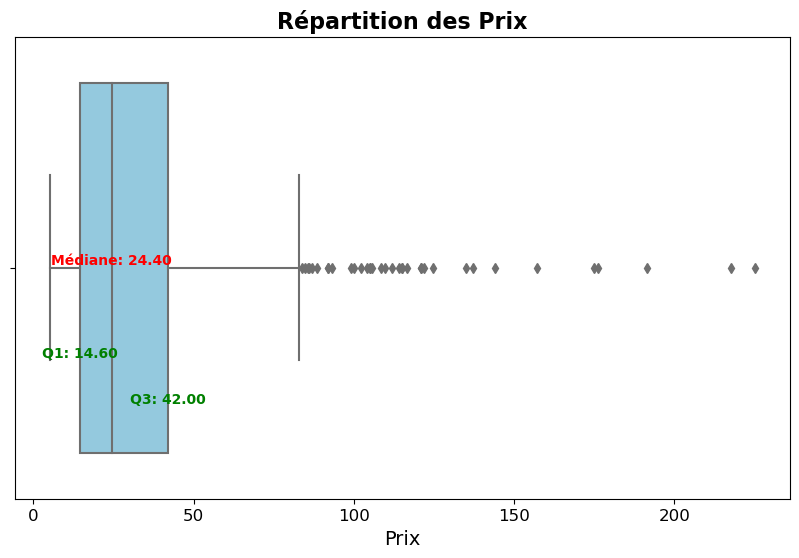

In [61]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

# Configuration de la taille de la figure
plt.figure(figsize=(10, 6))

# Création du boxplot avec une couleur spécifique
sns.boxplot(x=df_erp['price'], color='skyblue')

# Ajout du titre et des étiquettes pour les axes
plt.title('Répartition des Prix', fontsize=16, fontweight='bold')
plt.xlabel('Prix', fontsize=14)
plt.xticks(fontsize=12)

# Ajout des valeurs spécifiques sur le boxplot
q1 = df_erp['price'].quantile(0.25)
median = df_erp['price'].median()
q3 = df_erp['price'].quantile(0.75)

plt.text(median, 0.00, f'Médiane: {median:.2f}', ha='center', va='bottom', fontweight='bold', color='red')
plt.text(q1, 0.2, f'Q1: {q1:.2f}', ha='center', va='bottom', fontweight='bold', color='green')
plt.text(q3, 0.3, f'Q3: {q3:.2f}', ha='center', va='bottom', fontweight='bold', color='green')

# Affichage de la figure
plt.show()

In [62]:
#Autre méthode avec plotly express

# Création du diagramme de densité pour la variable 'price'
fig = px.histogram(df_erp, x='price', histnorm='density',
                   nbins=50, color_discrete_sequence=['skyblue'],
                   title='Diagramme de Densité des Prix')

# Personnalisation des axes et du titre
fig.update_layout(
    xaxis_title='Prix',
    yaxis_title='Densité',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)

# Ajout de la courbe de densité de KDE
fig.add_trace(
    px.histogram(df_erp, x='price', histnorm='density', nbins=50).data[0]
)

# Affichage du graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [63]:
#Calculer la moyenne du prix
prix_moyen = df_erp['price'].mean()
print(f"Le prix moyen est : {prix_moyen:.2f}€")

#Calculer l'écart-type du prix
ecart_type = df_erp['price'].std()
print(f"L'écart-type du prix est : {ecart_type:.2f}€")

#Calculer le Z-score
# Calcul du Z-score pour chaque prix
df_erp['z_score'] = (df_erp['price'] - prix_moyen) / ecart_type

# Affichage du DataFrame avec les Z-scores
df_erp

Le prix moyen est : 32.35€
L'écart-type du prix est : 26.62€


product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
817        7203           0   45.0              30      instock   
818        7204           0   45.0               9      instock   
819        7247           1   54.8               6      instock   
820        7329           0   26.5              14      instock   
821        7338           1   16.3              40      instock   

     purchase_price   z_score  
0             12.88 -0.306144  
1             17.54  0.073235  
2             10.64 -0.433856  
3              6.92 -0.685523  
4             23.77  0.512714  
..              ...       ...  
817           23.48  0.475151  
818           24.18  0.475151  
819           27.18  0.843262  
820           13.42 -0.219751  
821            8.00 -0.602886  

[822 rows x 7 columns]

In [64]:
#Quel est le seuil prix dont z-score est supérieur à 3?
seuil_prix = df_erp[df_erp['z_score'] > 3]

# Afficher les prix dont le Z-sdf_erp['z_score'].min()core est supérieur à 3

PMIN = seuil_prix['price'].min()
print('Le seuil prix:',PMIN,'€')

Le seuil prix: 114.0 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [65]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
stats_descriptives = df_erp['price'].describe()

print(stats_descriptives)


count    822.000000
mean      32.350304
std       26.622453
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [66]:
#Définissez un seuil pour les articles "outliers" en prix
# Calcul des quartiles
Q1 = df_erp['price'].quantile(0.25)
Q3 = df_erp['price'].quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Définition des seuils pour les outliers
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

print(f"Seuil inférieur: {seuil_inferieur:.2f}")
print(f"Seuil supérieur: {seuil_superieur:.2f}")

# Identification des outliers
outliers = df_erp[(df_erp['price'] < seuil_inferieur) | (df_erp['price'] > seuil_superieur)]

print("Articles outliers:")
outliers

Seuil inférieur: -26.50
Seuil supérieur: 83.10
Articles outliers:


product_id  onsale_web  price  stock_quantity stock_status  \
19         4055           0   86.1               0   outofstock   
66         4115           1  100.0              12      instock   
68         4132           1   88.4               7      instock   
207        4352           1  225.0               0   outofstock   
213        4359           1   85.6             112      instock   
226        4402           1  176.0              11      instock   
227        4404           1  108.5              17      instock   
229        4406           1  157.0              12      instock   
230        4407           1  104.0              14      instock   
239        4582           1  109.6              18      instock   
241        4594           1  144.0               0   outofstock   
409        4903           1  102.3              12      instock   
410        4904           1  137.0               9      instock   
459        5001           1  217.5              18      instock   
464        5007           1  105.0              15      instock   
465        5008           1  105.0              12      instock   
473        5025           1  112.0             136      instock   
474        5026           1   86.8             101      instock   
484        5070           1   84.7               0   outofstock   
543        5565           1   92.0               0   outofstock   
549        5580           1   83.7               4      instock   
554        5612           1  124.8              19      instock   
596        5767           1  175.0              12      instock   
633        5892           1  191.3              98      instock   
648        5916           1   93.0               1      instock   
649        5917           1  122.0              12      instock   
650        5918           1  114.0              12      instock   
695        6126           1  135.0             138      instock   
700        6201           1  105.6              16      instock   
701        6202           1  116.4              12      instock   
706        6212           1  115.0              16      instock   
707        6213           1  121.0               9      instock   
708        6214           1   99.0               9      instock   
709        6215           1  115.0              14      instock   
710        6216           1  121.0              14      instock   
722        6324           0   92.0              18      instock   

     purchase_price   z_score  
19            37.88  2.018961  
66            52.70  2.541077  
68            44.30  2.105354  
207          137.81  7.236362  
213           51.93  2.000180  
226           78.25  5.395810  
227           52.22  2.860356  
229           69.08  4.682127  
230           46.71  2.691326  
239           53.80  2.901675  
241           87.36  4.193817  
409           51.80  2.627470  
410           67.95  3.930881  
459          116.87  6.954644  
464           55.88  2.728888  
465           56.42  2.728888  
473           68.60  2.991824  
474           50.13  2.045255  
484           47.43  1.966374  
543           46.11  2.240578  
549           41.08  1.928812  
554           66.41  3.472621  
596           90.42  5.358248  
633          116.06  5.970513  
648           40.49  2.278141  
649           54.24  3.367447  
650           52.25  3.066949  
695           80.33  3.855756  
700           57.29  2.751425  
701           63.15  3.157098  
706           59.42  3.104511  
707           63.14  3.329885  
708           49.62  2.503514  
709           56.45  3.104511  
710           60.02  3.329885  
722           99.00  2.240578

In [67]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

nombre_outliers = outliers.shape[0]
print(f"Nombre d'articles outliers: {nombre_outliers}")

Nombre d'articles outliers: 36


In [68]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

# afficher les 36 valeurs
print('les prix sont élevés pour quelques produits premiums')
outliers

les prix sont élevés pour quelques produits premiums


product_id  onsale_web  price  stock_quantity stock_status  \
19         4055           0   86.1               0   outofstock   
66         4115           1  100.0              12      instock   
68         4132           1   88.4               7      instock   
207        4352           1  225.0               0   outofstock   
213        4359           1   85.6             112      instock   
226        4402           1  176.0              11      instock   
227        4404           1  108.5              17      instock   
229        4406           1  157.0              12      instock   
230        4407           1  104.0              14      instock   
239        4582           1  109.6              18      instock   
241        4594           1  144.0               0   outofstock   
409        4903           1  102.3              12      instock   
410        4904           1  137.0               9      instock   
459        5001           1  217.5              18      instock   
464        5007           1  105.0              15      instock   
465        5008           1  105.0              12      instock   
473        5025           1  112.0             136      instock   
474        5026           1   86.8             101      instock   
484        5070           1   84.7               0   outofstock   
543        5565           1   92.0               0   outofstock   
549        5580           1   83.7               4      instock   
554        5612           1  124.8              19      instock   
596        5767           1  175.0              12      instock   
633        5892           1  191.3              98      instock   
648        5916           1   93.0               1      instock   
649        5917           1  122.0              12      instock   
650        5918           1  114.0              12      instock   
695        6126           1  135.0             138      instock   
700        6201           1  105.6              16      instock   
701        6202           1  116.4              12      instock   
706        6212           1  115.0              16      instock   
707        6213           1  121.0               9      instock   
708        6214           1   99.0               9      instock   
709        6215           1  115.0              14      instock   
710        6216           1  121.0              14      instock   
722        6324           0   92.0              18      instock   

     purchase_price   z_score  
19            37.88  2.018961  
66            52.70  2.541077  
68            44.30  2.105354  
207          137.81  7.236362  
213           51.93  2.000180  
226           78.25  5.395810  
227           52.22  2.860356  
229           69.08  4.682127  
230           46.71  2.691326  
239           53.80  2.901675  
241           87.36  4.193817  
409           51.80  2.627470  
410           67.95  3.930881  
459          116.87  6.954644  
464           55.88  2.728888  
465           56.42  2.728888  
473           68.60  2.991824  
474           50.13  2.045255  
484           47.43  1.966374  
543           46.11  2.240578  
549           41.08  1.928812  
554           66.41  3.472621  
596           90.42  5.358248  
633          116.06  5.970513  
648           40.49  2.278141  
649           54.24  3.367447  
650           52.25  3.066949  
695           80.33  3.855756  
700           57.29  2.751425  
701           63.15  3.157098  
706           59.42  3.104511  
707           63.14  3.329885  
708           49.62  2.503514  
709           56.45  3.104511  
710           60.02  3.329885  
722           99.00  2.240578

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [69]:
df_unique_sku_web

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
2     14692        0             0             0             0.0          5.0   
4     15328        0             0             0             0.0          2.0   
6     16515        0             0             0             0.0         10.0   
8                  0             0             0             NaN          NaN   
11    16585        0             0             0             0.0         15.0   
...     ...      ...           ...           ...             ...          ...   
1503  13074        0             0             0             0.0          4.0   
1505  16322        0             0             0             0.0          0.0   
1507  12365        0             0             0             0.0         10.0   
1508  16326        0             0             0             0.0          5.0   
1509  15662        0             0             0             0.0         15.0   

     tax_status  post_author           post_date       post_date_gmt  \
2       taxable          2.0 2019-03-19 10:06:47 2019-03-19 09:06:47   
4       taxable          2.0 2019-03-27 18:05:09 2019-03-27 17:05:09   
6       taxable          2.0 2018-06-02 09:31:31 2018-06-02 07:31:31   
8           NaN          NaN                 NaT                 NaT   
11      taxable          2.0 2018-02-16 14:03:16 2018-02-16 13:03:16   
...         ...          ...                 ...                 ...   
1503    taxable          2.0 2018-02-12 14:25:28 2018-02-12 13:25:28   
1505    taxable          2.0 2018-02-15 13:51:32 2018-02-15 12:51:32   
1507    taxable          2.0 2019-01-29 15:53:05 2019-01-29 14:53:05   
1508    taxable          2.0 2019-04-18 11:32:46 2019-04-18 09:32:46   
1509    taxable          2.0 2018-02-27 10:13:03 2018-02-27 09:13:03   

     product_type                                         post_title  \
2             Vin      Château Fonréaud Bordeaux Blanc Le Cygne 2016   
4             Vin               Agnès Levet Côte Rôtie Maestria 2017   
6             Vin  Château Turcaud Bordeaux Rouge Cuvée Majeure 2018   
8             NaN                                                NaN   
11            Vin            Xavier Frissant Touraine Sauvignon 2019   
...           ...                                                ...   
1503          Vin  Château de Vaudieu Châteauneuf-du-Pape L'Avenu...   
1505          Vin  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
1507          Vin                   Parés Baltà Penedès Electio 2013   
1508          Vin    Camin Larredya Jurançon Moelleux Au Capcéu 2018   
1509          Vin  Chermette Domaine du Vissoux Beaujolais Griott...   

                                           post_excerpt post_status  \
2     <div>Grâce à la complémentarité des 3 cépages ...     publish   
4     <span style="float: none; background-color: tr...     publish   
6     <div id="wrapper">\n<div id="container-wrapper...     publish   
8                                                   NaN         NaN   
11    Un joli sauvignon frais et minéral, avec d'int...     publish   
...                                                 ...         ...   
1503  "L'Avenue" est issue d’une parcelle de vieux g...     publish   
1505  Belle complexité aromatique alliant fruits rou...     publish   
1507  Une cuvée produite avec une très vieille vigne...     publish   
1508  Sur le millésime 2017, Au Capceu du domaine Ca...     publish   
1509  C'est le Beaujolais typique : fruité, frais, g...     publish   

     comment_status ping_status  \
2            closed      closed   
4            closed      closed   
6            closed      closed   
8               NaN         NaN   
11           closed      closed   
...             ...         ...   
1503         closed      closed   
1505         closed      closed   
1507         closed      closed   
1508         closed      closed   
1509         closed      closed   

                               

In [70]:
##############################
# Calculer le CA du site web #
##############################

df_merge= pd.merge((df_erp_liaison), (df_unique_sku_web), on = ['sku'], how = 'outer')
df_merge
#Créez une colonne calculant le CA par article
df_merge['CA'] = df_merge['price'] * df_merge['total_sales']
df_merge

#Calculez la somme de la colonne "ca_par_article"

somme_ca_par_article = df_merge['CA'].sum()
print(f"La somme de la colonne 'ca_par_article' est : {somme_ca_par_article:.2f} €")
#Ce résultat correspond au chiffre d'affaire du site web

La somme de la colonne 'ca_par_article' est : 143680.10 €


In [71]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_tri_ca = df_merge.sort_values(by='CA', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_tri_ca_reset = df_tri_ca.reset_index(drop=True)

#Afficher les 20 premier articles en CA
df_tri_ca_reset.head(20)

product_id  onsale_web  price  stock_quantity stock_status  \
0       4352.0         1.0  225.0             0.0   outofstock   
1       5892.0         1.0  191.3            98.0      instock   
2       4353.0         1.0   79.5           127.0      instock   
3       5826.0         1.0   41.2            34.0      instock   
4       6212.0         1.0  115.0            16.0      instock   
5       5026.0         1.0   86.8           101.0      instock   
6       5008.0         1.0  105.0            12.0      instock   
7       5767.0         1.0  175.0            12.0      instock   
8       6126.0         1.0  135.0           138.0      instock   
9       5025.0         1.0  112.0           136.0      instock   
10      6201.0         1.0  105.6            16.0      instock   
11      4406.0         1.0  157.0            12.0      instock   
12      4647.0         1.0   28.5            45.0      instock   
13      4358.0         1.0   77.0            81.0      instock   
14      4359.0         1.0   85.6           112.0      instock   
15      6214.0         1.0   99.0             9.0      instock   
16      6202.0         1.0  116.4            12.0      instock   
17      4350.0         1.0   79.5           145.0      instock   
18      4573.0         1.0   67.2            12.0      instock   
19      4402.0         1.0  176.0            11.0      instock   

    purchase_price    sku  virtual  downloadable  rating_count  \
0           137.81  15940      0.0           0.0           0.0   
1           116.06  14983      0.0           0.0           0.0   
2            45.91  12587      0.0           0.0           0.0   
3            21.71  15325      0.0           0.0           0.0   
4            59.42  13996      0.0           0.0           0.0   
5            50.13  13913      0.0           0.0           0.0   
6            56.42  11602      0.0           0.0           0.0   
7            90.42  15185      0.0           0.0           0.0   
8            80.33  14923      0.0           0.0           0.0   
9            68.60  13914      0.0           0.0           0.0   
10           57.29  14596      0.0           0.0           0.0   
11           69.08   7819      0.0           0.0           0.0   
12           14.14  16525      0.0           0.0           0.0   
13           47.16  13854      0.0           0.0           0.0   
14           51.93  13853      0.0           0.0           0.0   
15           49.62  11601      0.0           0.0           0.0   
16           63.15  15126      0.0           0.0           0.0   
17           47.30  12588      0.0           0.0           0.0   
18           36.46  13604      0.0           0.0           0.0   
19           78.25   3510      0.0           0.0           0.0   

    average_rating  total_sales tax_status  post_author           post_date  \
0              0.0         11.0    taxable          2.0 2018-03-02 10:30:04   
1              0.0          6.0    taxable          2.0 2019-03-28 10:21:36   
2              0.0         14.0    taxable          2.0 2018-03-02 10:37:26   
3              0.0         20.0    taxable          2.0 2019-03-27 17:59:49   
4              0.0          7.0    taxable          2.0 2019-07-25 09:09:17   
5              0.0          9.0    taxable          2.0 2018-07-18 10:46:30   
6              0.0          7.0    taxable          2.0 2018-07-17 10:52:41   
7              0.0          4.0    taxable          2.0 2019-03-13 14:43:22   
8              0.0          5.0    taxable          2.0 2019-06-28 17:22:27   
9              0.0          6.0    taxable          2.0 2018-07-18 10:39:43   
10             0.0          6.0    taxable          2.0 2019-07-23 10:37:14   
11             0.0          4.0    taxable          2.0 2018-03-22 11:42:48   
12             0.0         22.0    taxable          2.0 2018-04-17 09:28:58   
13             0.0          8.0    taxable          2.0 2018-03-02 11:03:30   
14             0.0          7.0    taxable   

In [72]:
# Sélection des 20 premiers articles
top_20_articles = df_tri_ca_reset.head(20)

# Création du graphique en barres
fig = px.bar(top_20_articles, 
             x='post_title', 
             y='CA',            
             title='Top 20 articles par chiffre d\'affaires',
             labels={'sku': 'Article', 'CA': 'Chiffre d\'affaires'},
             text='CA')

# Personnalisation de l'apparence du graphique
fig.update_layout(xaxis_title='Article', 
                  yaxis_title='Chiffre d\'affaires',
                  xaxis={'categoryorder':'total descending', 'tickangle': -45},
                  plot_bgcolor='#ffffff') 

# Affichage du graphique
fig.show()

In [73]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
ca_total = df_tri_ca['CA'].sum()

# Création de la colonne 'part_CA' qui contient la part du CA de chaque ligne
df_tri_ca['part_CA'] = df_tri_ca['CA'] / ca_total*100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_tri_ca['cumulative_part_CA'] = df_tri_ca['part_CA'].cumsum()

df_tri_ca.head()

product_id  onsale_web  price  stock_quantity stock_status  \
291      4352.0         1.0  225.0             0.0   outofstock   
692      5892.0         1.0  191.3            98.0      instock   
292      4353.0         1.0   79.5           127.0      instock   
687      5826.0         1.0   41.2            34.0      instock   
763      6212.0         1.0  115.0            16.0      instock   

     purchase_price    sku  virtual  downloadable  rating_count  \
291          137.81  15940      0.0           0.0           0.0   
692          116.06  14983      0.0           0.0           0.0   
292           45.91  12587      0.0           0.0           0.0   
687           21.71  15325      0.0           0.0           0.0   
763           59.42  13996      0.0           0.0           0.0   

     average_rating  total_sales tax_status  post_author           post_date  \
291             0.0         11.0    taxable          2.0 2018-03-02 10:30:04   
692             0.0          6.0    taxable          2.0 2019-03-28 10:21:36   
292             0.0         14.0    taxable          2.0 2018-03-02 10:37:26   
687             0.0         20.0    taxable          2.0 2019-03-27 17:59:49   
763             0.0          7.0    taxable          2.0 2019-07-25 09:09:17   

          post_date_gmt product_type  \
291 2018-03-02 09:30:04    Champagne   
692 2019-03-28 09:21:36    Champagne   
292 2018-03-02 09:37:26    Champagne   
687 2019-03-27 16:59:49          Vin   
763 2019-07-25 07:09:17          Vin   

                                            post_title  \
291     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
692  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
292          Champagne Egly-Ouriet Grand Cru Brut Rosé   
687              Agnès Levet Côte Rôtie Améthyste 2017   
763  Domaine des Comtes Lafon Volnay 1er Cru Santen...   

                                          post_excerpt post_status  \
291  Issu d’un assemblage de 70% de Pinot Noir du g...     publish   
692  Cet Ambonnay évoque les grands Pinots Noirs de...     publish   
292  &nbsp;\n\nLe Rosé Grand Cru de la maison Egly-...     publish   
687  <span style="float: none;background-color: tra...     publish   
763  "Il s'agit là de la meilleure partie de l'appe...     publish   

    comment_status ping_status  \
291         closed      closed   
692         closed      closed   
292         closed      closed   
687         closed      closed   
763         closed      closed   

                                             post_name       post_modified  \
291     champagne-egly-ouriet-grand-cru-millesime-2008 2020-03-07 11:18:45   
692  coteaux-champenois-egly-ouriet-ambonnay-rouge-... 2020-04-01 09:30:09   
292          champagne-egly-ouriet-grand-cru-brut-rose 2020-08-22 11:45:02   
687                         agnes-levet-amethyste-2017 2020-05-21 14:00:02   
763  domaine-des-comtes-lafon-volnay-1er-cru-santen... 2020-06-16 09:30:16   

      post_modified_gmt  post_parent  \
291 2020-03-07 10:18:45          0.0   
692 2020-04-01 07:30:09          0.0   
292 2020-08-22 09:45:02          0.0   
687 2020-05-21 12:00:02          0.0   
763 2020-06-16 07:30:16          0.0   

                                                  guid  menu_order post_type  \
291  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
692  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
292  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
687  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
763  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

    post_mime_type  comment_count      CA   part_CA  cumulative_part_CA  
291            NaN            0.0  2475.0  1.722577            1.722577  
692            NaN            0.0  1147.8  0.798858            2.521435  
292            NaN            0.0  1113.0  0.774638            3.296072  
687            

In [74]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
nb_articles_80_percent = df_tri_ca[df_tri_ca['cumulative_part_CA'] <= 80].shape[0]

print(f"Le nombre d'articles représentant 80% du CA est : {nb_articles_80_percent}")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

prop=round(nb_articles_80_percent/df_tri_ca.shape[0]*100,2)

print(f"La proportion est : {prop}%")


Le nombre d'articles représentant 80% du CA est : 434
La proportion est : 47.69%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [75]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_tri_qv = df_merge.sort_values(by='total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_tri_qv_reset = df_tri_qv.reset_index(drop=True)

#Afficher les 20 premier articles en quantité
df_tri_qv_reset.head(20)

#Graphique en barre des 20 premiers articles avec plotly express
top_20_articles = df_tri_qv_reset.head(20)

# Le graphique en barres
fig = px.bar(top_20_articles, 
             x='post_title',
             y='total_sales', 
             title='Top 20 articles par quantités vendues',
             labels={'sku': 'Article', 'total_sales': 'Quantités vendues'},
             text='total_sales')

# Personnaliser l'apparence du graphique
fig.update_layout(
    xaxis_title='Article', 
    yaxis_title='Quantités vendues',
    xaxis={'categoryorder':'total descending'},
    plot_bgcolor='#ffffff'
)

# Modifier la couleur des barres en rouge
fig.update_traces(marker_color='green')

# Afficher le graphique
fig.show()

In [76]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge.sort_values('total_sales',ascending=False, inplace=True)

df_merge['total_cumulative_sales']= df_merge['total_sales'].cumsum()
quantite_totale = df_merge['total_sales'].sum()

df_merge['part_quantite'] = df_merge['total_cumulative_sales'] / quantite_totale

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée



df_merge[['sku', 'total_sales','total_cumulative_sales', 'part_quantite']]

sku  total_sales  total_cumulative_sales  part_quantite
461  16148         36.0                    36.0       0.006340
213  15415         27.0                    63.0       0.011095
266  14864         24.0                    87.0       0.015322
359  16525         22.0                   109.0       0.019197
415  14950         22.0                   131.0       0.023072
..     ...          ...                     ...            ...
905                 NaN                     NaN            NaN
906                 NaN                     NaN            NaN
907                 NaN                     NaN            NaN
908                 NaN                     NaN            NaN
909                 NaN                     NaN            NaN

[910 rows x 4 columns]

In [77]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

# Trier les articles par 'quantite' en ordre décroissant
#df_merge_sorted = df_merge.sort_values(by='part_quantite', ascending=False)

# Calculer la quantité cumulative
#df_merge_sorted['cumulative_part_quantite'] = df_merge_sorted['part_quantite'].cumsum()

# Calculer la part cumulative des ventes pour chaque article
#df_merge_sorted['cumulative_part_quantite'] = df_merge_sorted['cumulative_part_quantite'] / df_merge_sorted['part_quantite'].sum()

#Trouver le nombre d'articles qui représentent 80% des ventes
nombre_articles_80 = df_merge[df_merge['part_quantite'] <= 0.8].shape[0]

# Afficher le résultat
print(f"Nombre d'articles représentant 80% des ventes en quantité : {nombre_articles_80}")

Nombre d'articles représentant 80% des ventes en quantité : 424


In [78]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

nombre_total_articles = df_merge.shape[0]

#  Calculer la proportion
proportion_articles_80 = nombre_articles_80 / nombre_total_articles

print(f"Proportion d'articles représentant 80% des ventes en quantité par rapport à l'ensemble du catalogue : {proportion_articles_80:.2%}")

Proportion d'articles représentant 80% des ventes en quantité par rapport à l'ensemble du catalogue : 46.59%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [79]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np

#Création de la colonne Rotation de stock
# 1. Créer une colonne 'rotation_stock' qui calcule la rotation de stock pour chaque article
df_merge['rotation_stock'] = df_merge['total_sales'] / df_merge['stock_quantity']

In [80]:
#Remplacement des "inf" par 0
df_merge = df_merge.replace([np.inf, -np.inf], 0)

In [81]:
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge


# Trier le DataFrame df_merge dans l'ordre décroissant par rapport à la colonne 'mois_stock'
df_merge_tri_mois = df_merge.sort_values(by='rotation_stock', ascending=False)

# Réinitialiser l'index après le tri
df_merge_tri_mois = df_merge_tri_mois.reset_index(drop=True)

# Afficher les premières lignes pour vérifier

Top_20= df_merge_tri_mois[['sku','post_title', 'total_sales', 'stock_quantity', 'rotation_stock']].head(20)
Top_20

sku                                         post_title  total_sales  \
0   10014                  Darnley's London Dry Gin Original         10.0   
1   15478  Marc Colin Et Fils Saint-Aubin Blanc En Montce...          5.0   
2    6616  Domaine Huet Vouvray Le Clos du Bourg Moelleux...          5.0   
3   11847  Thierry Germain Saumur-Champigny Outre Terre 2014          3.0   
4   13516  Thierry Germain Saumur-Champigny Les Mémoires ...          7.0   
5   12881    Domaine de Montbourgeau L'Etoile Vin Jaune 2009          6.0   
6   16152  Catherine et Claude Maréchal Pommard La Chaniè...          6.0   
7   15269       Pierre Gaillard Côte Rôtie Rose Pourpre 2017          2.0   
8   19815          Pierre Jean Villa Côte Rôtie Carmina 2017          3.0   
9   13217  Zind-Humbrecht Gewurztraminer Grand Cru Rangen...          1.0   
10  15567  Domaine de La Tour Du Bon Bandol Rouge En Sol ...          2.0   
11    791        Marcel Windholtz Eau de Vie de Baie de Houx          1.0   
12  14461              Château Carbonnieux Graves Blanc 2017          3.0   
13  15148  Catherine et Claude Maréchal Savigny-Lès-Beaun...          9.0   
14    805  Marcel Windholtz Eau de Vie de Poire Williams ...          2.0   
15  11849           Thierry Germain Saumur Blanc Terres 2014          7.0   
16  13515  Thierry Germain Saumur-Champigny Franc De Pied...          8.0   
17  14700   Albert Mann Pinot Gris Grand Cru Furstentum 2016          3.0   
18   8463  Domaine Huet Vouvray Le Mont Moelleux Première...          2.0   
19  15791           Weingut Besson-Strasser Zürich Fumé 2017          4.0   

    stock_quantity  rotation_stock  
0              7.0        1.428571  
1              5.0        1.000000  
2              5.0        1.000000  
3              3.0        1.000000  
4              7.0        1.000000  
5              6.0        1.000000  
6              6.0        1.000000  
7              2.0        1.000000  
8              3.0        1.000000  
9              1.0        1.000000  
10             2.0        1.000000  
11             1.0        1.000000  
12             3.0        1.000000  
13             9.0        1.000000  
14             2.0        1.000000  
15             7.0        1.000000  
16             8.0        1.000000  
17             3.0        1.000000  
18             2.0        1.000000  
19             4.0        1.000000

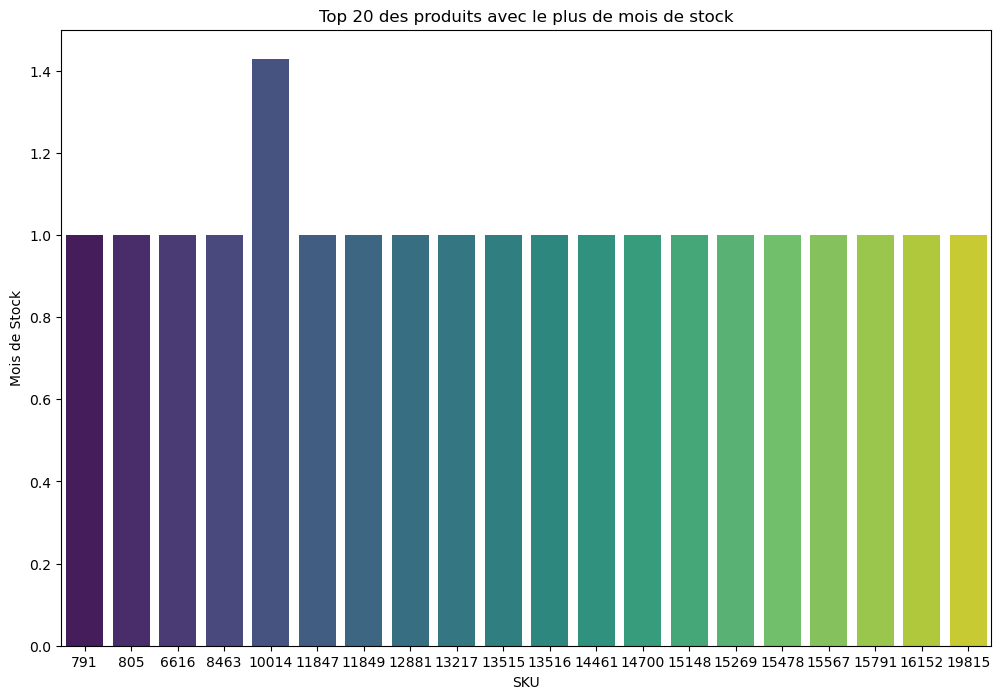

In [82]:
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

plt.figure(figsize=(12, 8))
sns.barplot(x='sku', y='rotation_stock', data=Top_20, palette='viridis')

# Ajouter des titres et des labels
plt.title('Top 20 des produits avec le plus de mois de stock')
plt.ylabel('Mois de Stock')
plt.xlabel('SKU')

# Afficher le graphique
plt.show()

In [83]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge['valorisation_stock'] = df_merge['stock_quantity'] * df_merge['price']

df_merge[['sku', 'stock_quantity', 'purchase_price', 'valorisation_stock']].head()

#Calculer la somme de la colonne "Valorisation_stock_euros"
Valorisation_stock_euros = df_merge['valorisation_stock'].sum()

print(f"La somme de la valorisation des stocks en euros est : {Valorisation_stock_euros:.2f} euros")

La somme de la valorisation des stocks en euros est : 531946.20 euros


In [84]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
somme_stock_quantity = df_merge['stock_quantity'].sum()

print(f"La somme des quantités en stock est : {somme_stock_quantity:.0f} unités")

La somme des quantités en stock est : 17803 unités


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [85]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['prix_HT'] = df_merge['price'] / 1.2

#Création de la colonne Taux de marge
df_merge['taux_marge']=(df_merge['prix_HT']-df_merge['purchase_price'])/df_merge['prix_HT']
df_merge[['sku', 'price', 'prix_HT','taux_marge']]

sku  price    prix_HT  taux_marge
461  16148    9.9   8.250000    0.410909
213  15415    9.9   8.250000    0.392727
266  14864   14.9  12.416667    0.373423
359  16525   28.5  23.750000    0.404632
415  14950   12.7  10.583333    0.355591
..     ...    ...        ...         ...
905           NaN        NaN         NaN
906           NaN        NaN         NaN
907           NaN        NaN         NaN
908           NaN        NaN         NaN
909           NaN        NaN         NaN

[910 rows x 4 columns]

In [86]:
#Afficher le prix minimum de la colonne "taux_marge"

prix_min = df_merge['taux_marge'].min()
print(f"Le prix minimum de la colonne 'taux_marge' est : {prix_min:.2f} euros")

#Afficher le prix maximum de la colonne "taux_marge"

prix_max = df_merge['taux_marge'].max()
print(f"Le prix maximum de la colonne 'taux_marge' est : {prix_max:.2f} euros")

Le prix minimum de la colonne 'taux_marge' est : -6.35 euros
Le prix maximum de la colonne 'taux_marge' est : 0.48 euros


In [87]:
#affichage de la ligne avec un taux de marge inférieur à 0
lignes_negatives = df_merge[df_merge['taux_marge'] < 0]

print("Lignes avec un taux de marge inférieur à 0 :")
lignes_negatives[['sku', 'price', 'prix_HT','taux_marge']]


Lignes avec un taux de marge inférieur à 0 :


sku  price    prix_HT  taux_marge
293  12589  12.65  10.541667   -6.349881
53     NaN  92.00  76.666667   -0.291304
102    NaN  31.00  25.833333   -0.207742
459  15154   8.30   6.916667   -0.444337

In [88]:
#création d'un dataframe avec les taux positifs
lignes_positives = df_merge[df_merge['taux_marge'] > 0]

print("Lignes avec un taux de marge supérieur à 0 :")
lignes_positives[['sku', 'price', 'prix_HT','taux_marge']]

Lignes avec un taux de marge supérieur à 0 :


sku  price    prix_HT  taux_marge
461    16148    9.9   8.250000    0.410909
213    15415    9.9   8.250000    0.392727
266    14864   14.9  12.416667    0.373423
359    16525   28.5  23.750000    0.404632
415    14950   12.7  10.583333    0.355591
..       ...    ...        ...         ...
717    15609   18.8  15.666667    0.405106
718    14377   27.3  22.750000    0.398681
720    13577   39.0  32.500000    0.361538
743    15529   12.9  10.750000    0.398140
823  14680-1   26.5  22.083333    0.392302

[818 rows x 4 columns]

In [89]:
#Afficher le prix minimum de la colonne "taux_marge"
prix_min_positives = lignes_positives['taux_marge'].min()
prix_min = lignes_positives.loc[lignes_positives['taux_marge'] == prix_min_positives, 'price'].values[0]
print(f"Le prix correspondant au taux de marge minimum ({prix_min_positives:.2f}) est : {prix_min:.2f} euros")

#Afficher le prix maximum de la colonne "taux_marge"
prix_max_positives = lignes_positives['taux_marge'].max()
prix_max = lignes_positives.loc[lignes_positives['taux_marge'] == prix_max_positives, 'price'].values[0]
print(f"Le prix correspondant au taux de marge maximum ({prix_max_positives:.2f}) est : {prix_max:.2f} euros")

Le prix correspondant au taux de marge minimum (0.23) est : 13.10 euros
Le prix correspondant au taux de marge maximum (0.48) est : 62.50 euros


In [90]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_merge['marge_taux_moyen'] = df_merge.groupby('product_type')['taux_marge'].mean()

df_merge[['sku', 'price', 'prix_HT','taux_marge','marge_taux_moyen','product_type']]

sku  price    prix_HT  taux_marge  marge_taux_moyen product_type
461  16148    9.9   8.250000    0.410909               NaN          Vin
213  15415    9.9   8.250000    0.392727               NaN          Vin
266  14864   14.9  12.416667    0.373423               NaN          Vin
359  16525   28.5  23.750000    0.404632               NaN          Vin
415  14950   12.7  10.583333    0.355591               NaN          Vin
..     ...    ...        ...         ...               ...          ...
905           NaN        NaN         NaN               NaN          NaN
906           NaN        NaN         NaN               NaN          NaN
907           NaN        NaN         NaN               NaN          NaN
908           NaN        NaN         NaN               NaN          NaN
909           NaN        NaN         NaN               NaN          NaN

[910 rows x 6 columns]

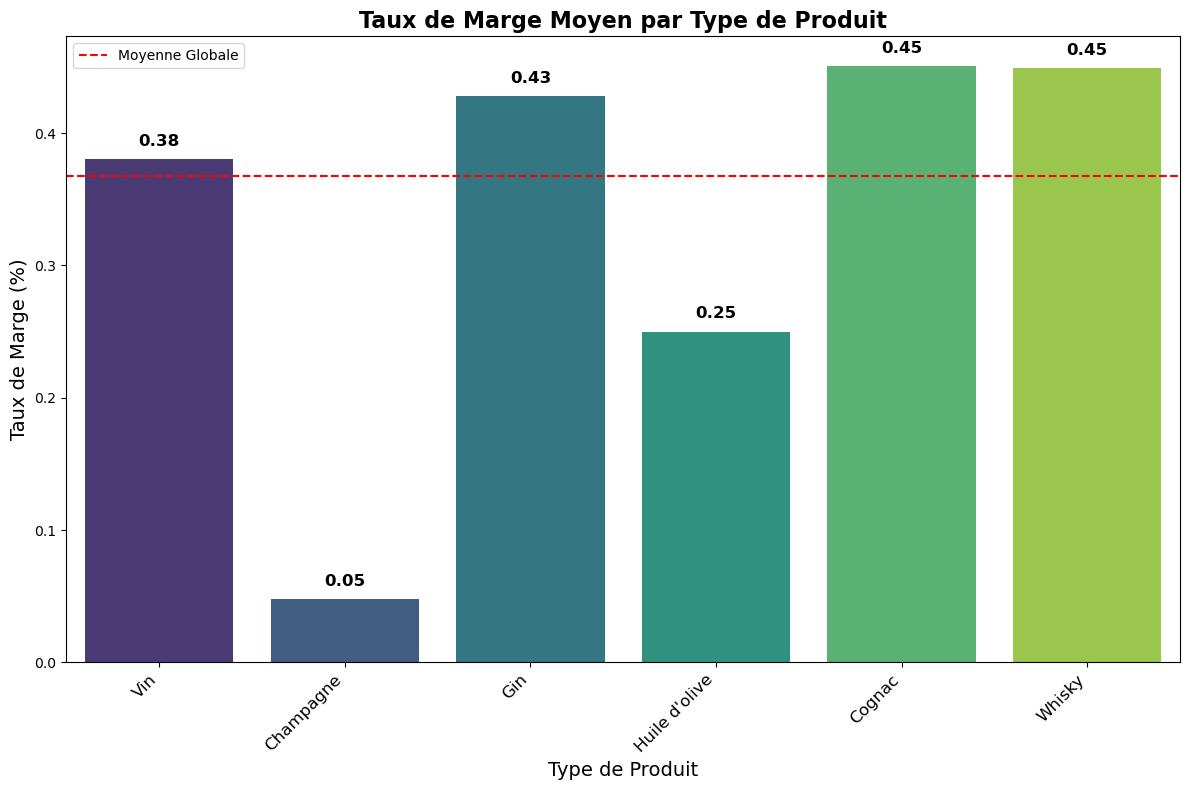

In [91]:
#Affichage dans un graphique du taux de marge par type de produit
# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Créer un graphique en barres du taux de marge moyen par type de produit
sns.barplot(x='product_type', y='taux_marge', data=df_merge, estimator='mean', palette='viridis', errorbar=None)

# Ajouter des titres et labels avec des polices plus grandes et personnalisées
plt.title('Taux de Marge Moyen par Type de Produit', fontsize=16, fontweight='bold')
plt.xlabel('Type de Produit', fontsize=14)
plt.ylabel('Taux de Marge (%)', fontsize=14)

# Rotation des labels de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajouter les valeurs numériques au-dessus des barres pour plus de clarté
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f'{bar.get_height():.2f}',
        ha='center', 
        fontsize=12, 
        fontweight='bold', 
        color='black'
    )

# Ajouter des lignes de référence pour aider à l'interprétation
plt.axhline(y=df_merge['taux_marge'].mean(), color='red', linestyle='--', linewidth=1.5, label='Moyenne Globale')
plt.legend()

# Ajuster les marges pour que tout soit bien visible
plt.tight_layout()

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

DataFrame après conversion :
      price  total_sales  stock_quantity
461    9.9         36.0           121.0
213    9.9         27.0            74.0
266   14.9         24.0            62.0
359   28.5         22.0            45.0
415   12.7         22.0             0.0
..     ...          ...             ...
905    NaN          NaN             NaN
906    NaN          NaN             NaN
907    NaN          NaN             NaN
908    NaN          NaN             NaN
909    NaN          NaN             NaN

[910 rows x 3 columns]
Matrice de corrélation :
                    price  total_sales  stock_quantity
price           1.000000    -0.516258       -0.106654
total_sales    -0.516258     1.000000        0.438930
stock_quantity -0.106654     0.438930        1.000000


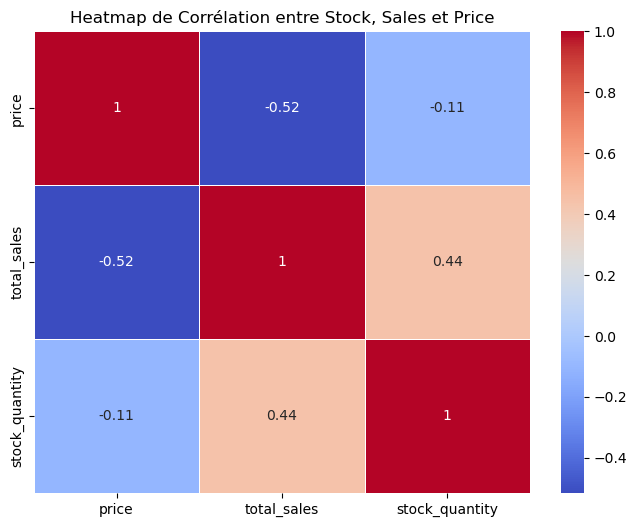

In [92]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#Création d'un heatmap de correlation avec les variables stock, sales et price
df_merge_stock_sales_price=df_merge[['price', 'total_sales', 'stock_quantity']]
# Convertir les colonnes en nombres, forçant les erreurs à NaN
df_merge_stock_sales_price = df_merge_stock_sales_price.apply(pd.to_numeric, errors='coerce')

# Affichage du DataFrame après conversion pour vérifier les valeurs
print("DataFrame après conversion :\n", df_merge_stock_sales_price)

# Suppression des lignes avec des valeurs NaN
df_merge_stock_sales_price = df_merge_stock_sales_price.dropna()

# Calcul de la matrice de corrélation
correlation_matrix = df_merge_stock_sales_price.corr()

# Affichage de la matrice de corrélation pour vérifier les valeurs
print("Matrice de corrélation :\n", correlation_matrix)

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Corrélation entre Stock, Sales et Price')
plt.show()

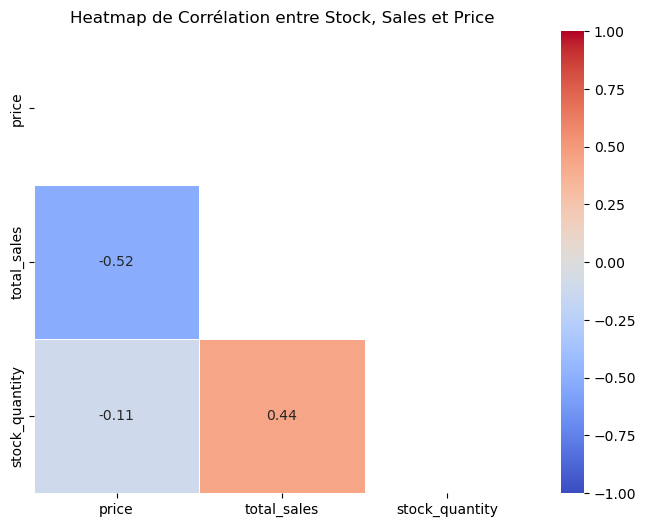

In [93]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélection des colonnes et conversion en numériques
df_merge_stock_sales_price = df_merge[['price', 'total_sales', 'stock_quantity']]
df_merge_stock_sales_price = df_merge_stock_sales_price.apply(pd.to_numeric, errors='coerce')

# Suppression des lignes avec des valeurs NaN
df_merge_stock_sales_price = df_merge_stock_sales_price.dropna()

# Calcul de la matrice de corrélation
correlation_matrix = df_merge_stock_sales_price.corr()

# Création du masque pour n'afficher que la moitié supérieure
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Création de la figure
plt.figure(figsize=(8, 6))

# Création de la heatmap avec le masque
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Titre
plt.title('Heatmap de Corrélation entre Stock, Sales et Price')
plt.show()

In [94]:
#Que peut-on conclure des correlations ?
print('1- Prix et Ventes Totales : Il y a une corrélation négative modérée (-0.52). Cela signifie que lorsque le prix augmente, les ventes totales ont tendance à diminuer.')
print('2- Quantité en Stock et Prix : La corrélation est très faible et négative (-0.11), indiquant qu’il y a peu de relation entre ces deux variables.')
print('3- Quantité en Stock et Ventes Totales : Il y a une corrélation positive modérée (0.44), ce qui suggère que lorsque la quantité en stock augmente, les ventes totales tendent également à augmenter.')

1- Prix et Ventes Totales : Il y a une corrélation négative modérée (-0.52). Cela signifie que lorsque le prix augmente, les ventes totales ont tendance à diminuer.
2- Quantité en Stock et Prix : La corrélation est très faible et négative (-0.11), indiquant qu’il y a peu de relation entre ces deux variables.
3- Quantité en Stock et Ventes Totales : Il y a une corrélation positive modérée (0.44), ce qui suggère que lorsque la quantité en stock augmente, les ventes totales tendent également à augmenter.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [95]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  

# le nom du fichier Excel

file_name = 'C:\\Users\\User\\Documents\\Data analyst\\Projet 6\\df_merge.xlsx'

# Exportation du DataFrame vers un fichier Excel

df_merge.to_excel(file_name, index=False)

print(f"Le DataFrame a été sauvegardé avec succès dans le fichier '{file_name}'")

Le DataFrame a été sauvegardé avec succès dans le fichier 'C:\Users\User\Documents\Data analyst\Projet 6\df_merge.xlsx'
